In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")  # header=0 est implicite ici


In [2]:
print(df.columns)

Index(['conca_bin', 'PLCG1', 'SORT1', 'PRKAA2', 'TSPAN5', 'ITGA6', 'PEG10',
       'AXIN2', 'GJA5', 'EPCAM', 'PLK1', 'IGF2BP2', 'LTBP2', 'GPC3', 'ITGA2',
       'LEF1', 'NOTUM'],
      dtype='object')


In [3]:
y = df["conca_bin"]
X = df.drop(columns=["conca_bin"])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sortie binaire

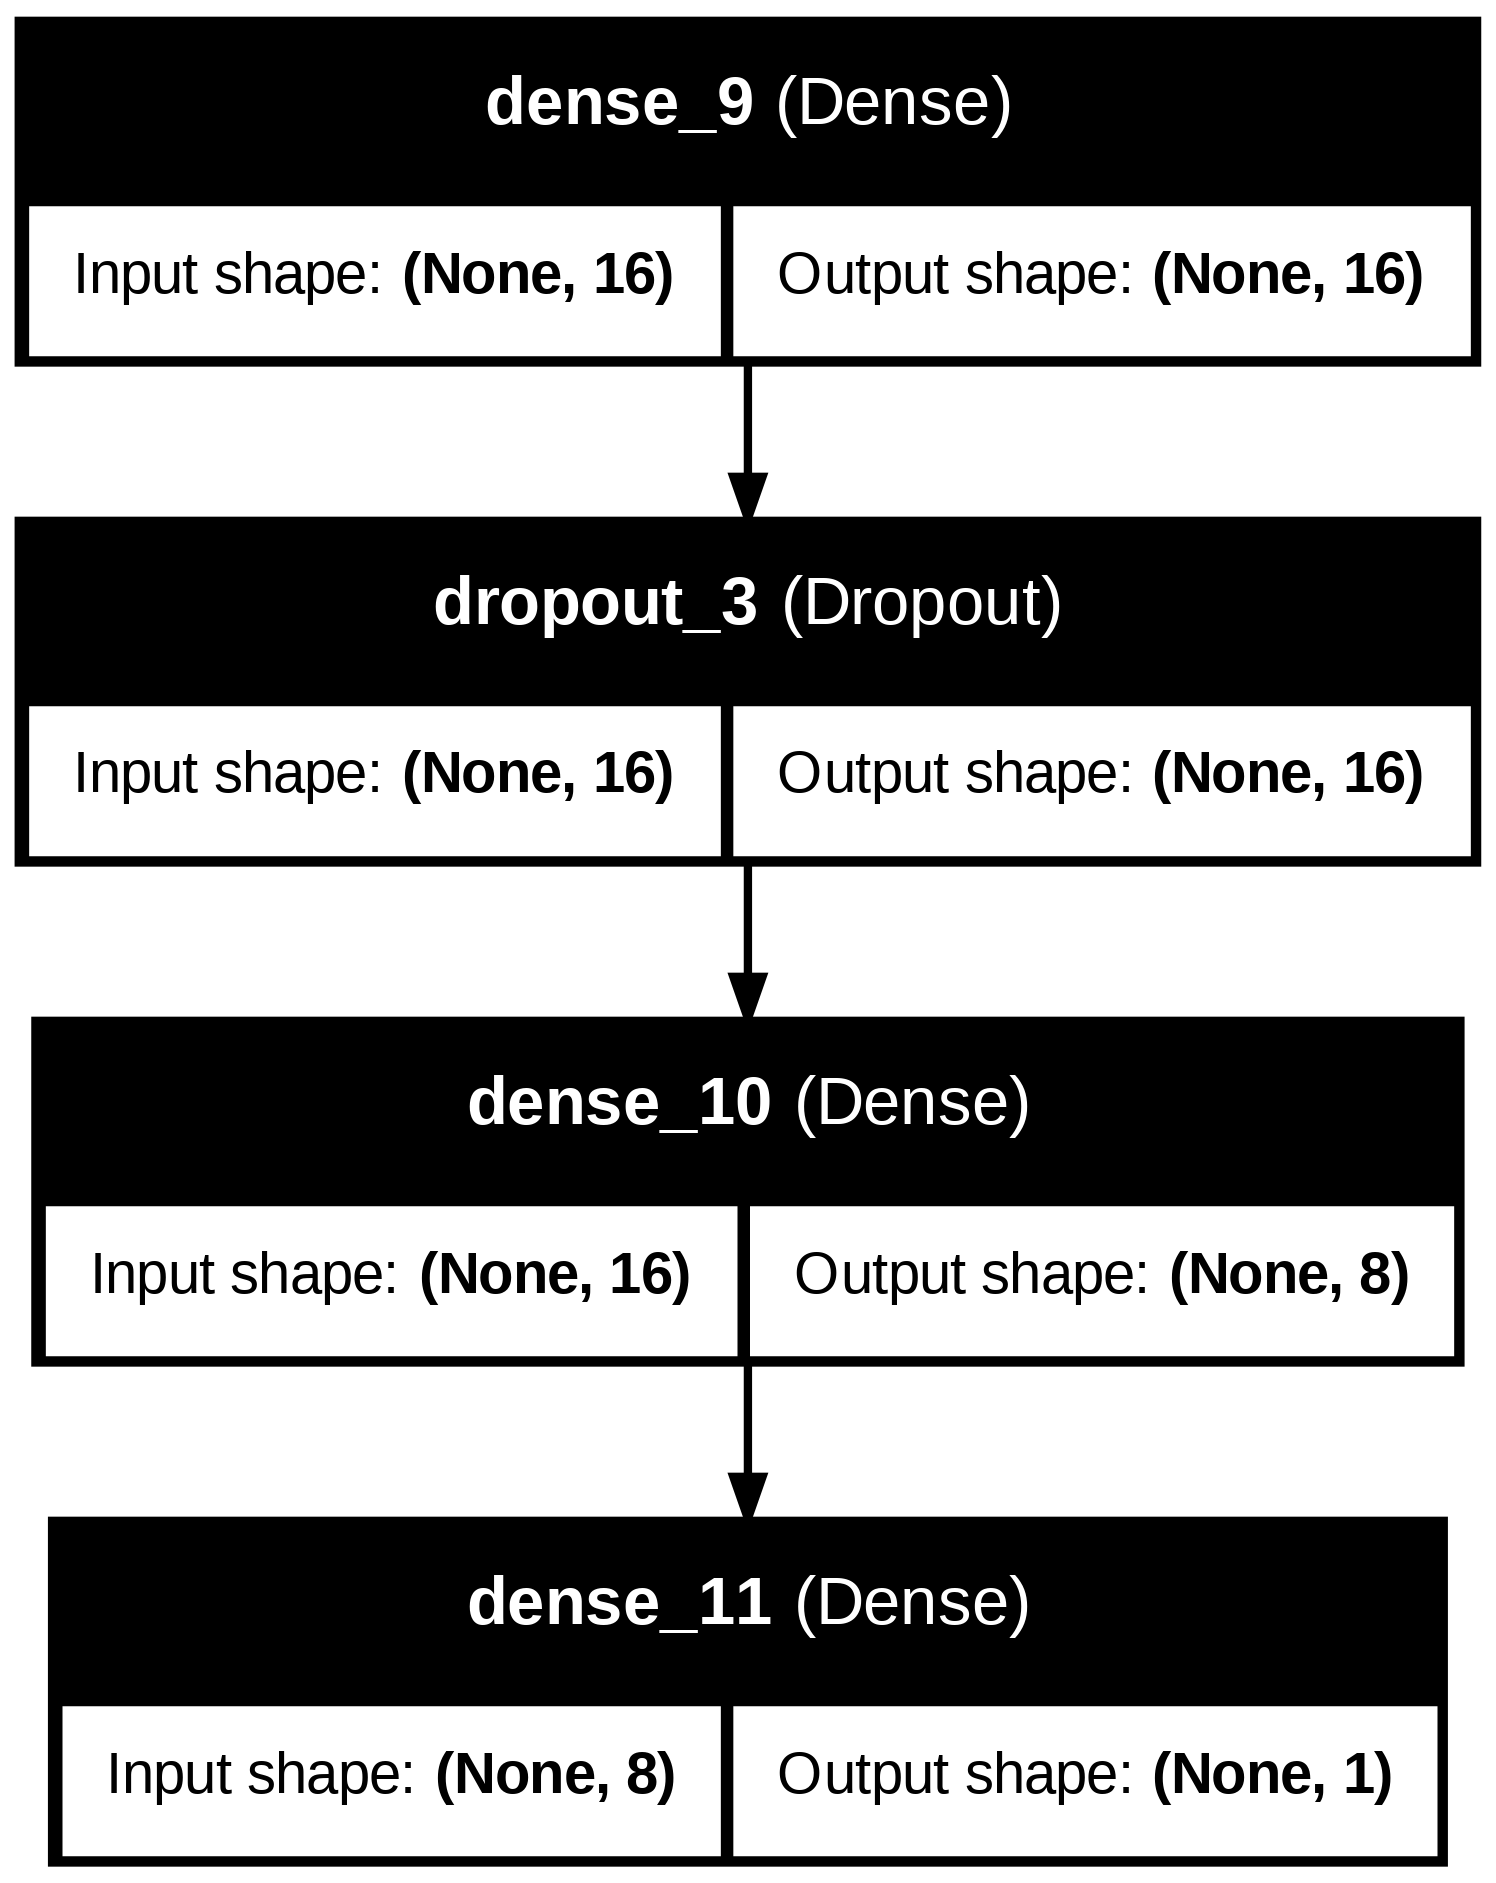

In [200]:
from tensorflow.keras.utils import plot_model

# Générer le schéma du modèle
plot_model(model,
           to_file="perceptron_schema.png",  # nom du fichier de sortie
           show_shapes=True,                 # affiche les dimensions des tensors
           show_layer_names=True,            # affiche les noms des couches
           dpi=300,                          # haute résolution
           expand_nested=False)              # pas de dépliage des sous-modèles


In [7]:
!apt-get install graphviz -y
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


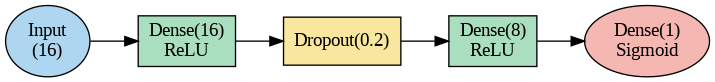

In [204]:
!apt-get install graphviz -y
!pip install graphviz

from graphviz import Digraph
from IPython.display import Image, display

# Initialiser le graphe
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10')

# Couche d'entrée
dot.node('Input', f'Input\n({X_train.shape[1]})', shape='ellipse', style='filled', fillcolor='#AED6F1')

# Couche Dense 1
dot.node('Dense1', 'Dense(16)\nReLU', shape='box', style='filled', fillcolor='#A9DFBF')

# Dropout
dot.node('Dropout', 'Dropout(0.2)', shape='box', style='filled', fillcolor='#F9E79F')

# Couche Dense 2
dot.node('Dense2', 'Dense(8)\nReLU', shape='box', style='filled', fillcolor='#A9DFBF')

# Couche de sortie
dot.node('Output', 'Dense(1)\nSigmoid', shape='ellipse', style='filled', fillcolor='#F5B7B1')

# Connexions
dot.edges([('Input', 'Dense1'),
           ('Dense1', 'Dropout'),
           ('Dropout', 'Dense2'),
           ('Dense2', 'Output')])

# Affichage dans Colab
display(Image(dot.pipe(format='png')))


In [172]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

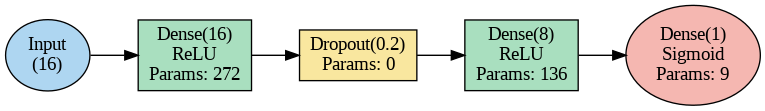

In [206]:
from graphviz import Digraph
from IPython.display import Image, display

# Dimensions
input_dim = X_train.shape[1]  # ici 16

# Calcul des paramètres
params_dense1 = input_dim * 16 + 16       # 16 neurones + biais
params_dense2 = 16 * 8 + 8                # 8 neurones + biais
params_output = 8 * 1 + 1                 # 1 neurone + biais

# Initialiser le graphe
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10')

# Couche d'entrée
dot.node('Input', f'Input\n({input_dim})', shape='ellipse', style='filled', fillcolor='#AED6F1')

# Couche Dense 1
dot.node('Dense1', f'Dense(16)\nReLU\nParams: {params_dense1}', shape='box', style='filled', fillcolor='#A9DFBF')

# Dropout
dot.node('Dropout', 'Dropout(0.2)\nParams: 0', shape='box', style='filled', fillcolor='#F9E79F')

# Couche Dense 2
dot.node('Dense2', f'Dense(8)\nReLU\nParams: {params_dense2}', shape='box', style='filled', fillcolor='#A9DFBF')

# Couche de sortie
dot.node('Output', f'Dense(1)\nSigmoid\nParams: {params_output}', shape='ellipse', style='filled', fillcolor='#F5B7B1')

# Connexions
dot.edges([('Input', 'Dense1'),
           ('Dense1', 'Dropout'),
           ('Dropout', 'Dense2'),
           ('Dense2', 'Output')])

# Affichage dans Colab
display(Image(dot.pipe(format='png')))



In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9239 - loss: 0.2305 - val_accuracy: 0.9977 - val_loss: 0.0106
Epoch 2/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9986 - val_loss: 0.0065
Epoch 3/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9984 - val_loss: 0.0063
Epoch 4/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9971 - loss: 0.0115 - val_accuracy: 0.9981 - val_loss: 0.0057
Epoch 5/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9961 - loss: 0.0105 - val_accuracy: 0.9986 - val_loss: 0.0049
Epoch 6/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9986 - val_loss: 0.0050
Epoch 7/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 8/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0063 - val_accuracy: 0.

In [12]:
# Évaluer sur le test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.3f}")


Test Accuracy: 0.999


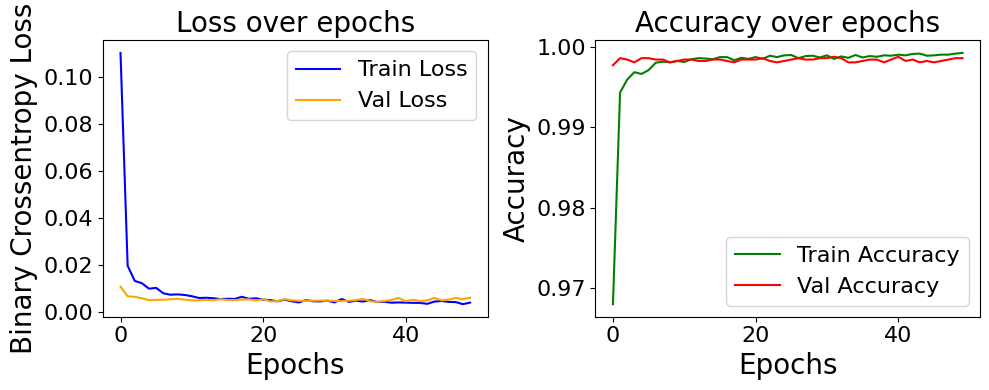

In [173]:
import matplotlib.pyplot as plt

# Courbes de perte et précision
plt.figure(figsize=(10, 4))

# Sous-figure 1 : perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss over epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Binary Crossentropy Loss', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=16)

# Sous-figure 2 : précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
plt.title('Accuracy over epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.savefig("learning.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()



In [14]:
## rOC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Prédire les probabilités (pas les classes)
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


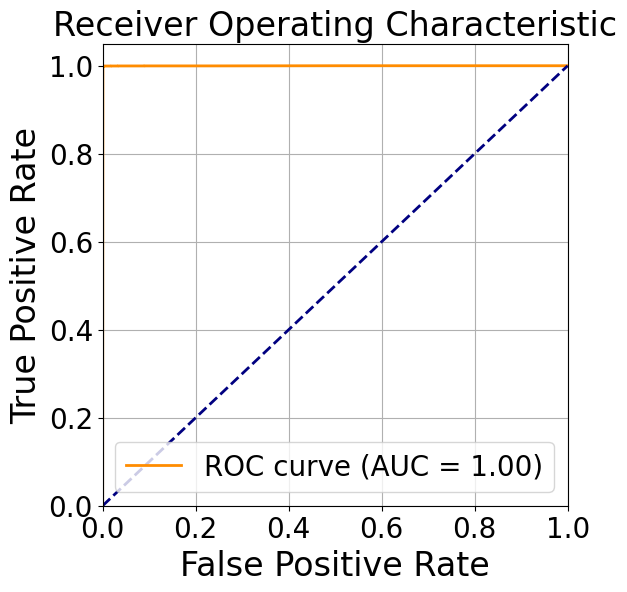

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # ligne diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Axes et titre avec police taille 24
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('Receiver Operating Characteristic', fontsize=24)

# Légende et ticks
plt.legend(loc="lower right", fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.grid(True)

# Sauvegarde avant affichage
plt.savefig("ROC.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()


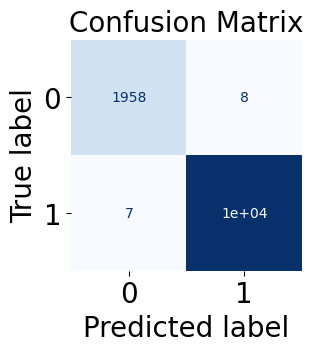

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire les classes binaires avec seuil 0.25
y_pred_class = (y_pred_proba >= 0.25).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Création de la figure avec axe personnalisé
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap='Blues', ax=ax, colorbar=False)

# Personnalisation complète
ax.set_title("Confusion Matrix", fontsize=20)
ax.set_xlabel("Predicted label", fontsize=20)
ax.set_ylabel("True label", fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Supprimer les bordures inutiles
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Sauvegarde haute résolution
plt.savefig("confusion.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()


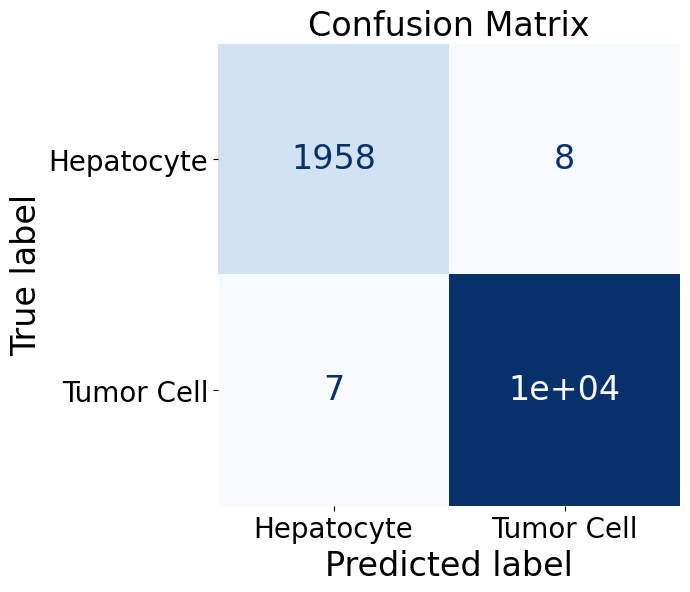

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédire les classes binaires avec seuil 0.25
y_pred_class = (y_pred_proba >= 0.25).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_class)

# Définir les labels biologiques
labels_bio = ["Hepatocyte", "Tumor Cell"]

# Créer l'affichage avec labels personnalisés
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_bio)

# Création de la figure
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, colorbar=False)

# Personnalisation des axes
ax.set_title("Confusion Matrix", fontsize=24)
ax.set_xlabel("Predicted label", fontsize=24)
ax.set_ylabel("True label", fontsize=24)
ax.tick_params(axis='both', labelsize=20)

# Supprimer les bordures inutiles
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# 🔠 Agrandir les chiffres dans les cases
for text_element in disp.text_.ravel():
    text_element.set_fontsize(24)

# Sauvegarde haute résolution
plt.savefig("confusion.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()


In [17]:
## rapport de classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, digits=3))

              precision    recall  f1-score   support

           0      0.996     0.996     0.996      1966
           1      0.999     0.999     0.999     10321

    accuracy                          0.999     12287
   macro avg      0.998     0.998     0.998     12287
weighted avg      0.999     0.999     0.999     12287



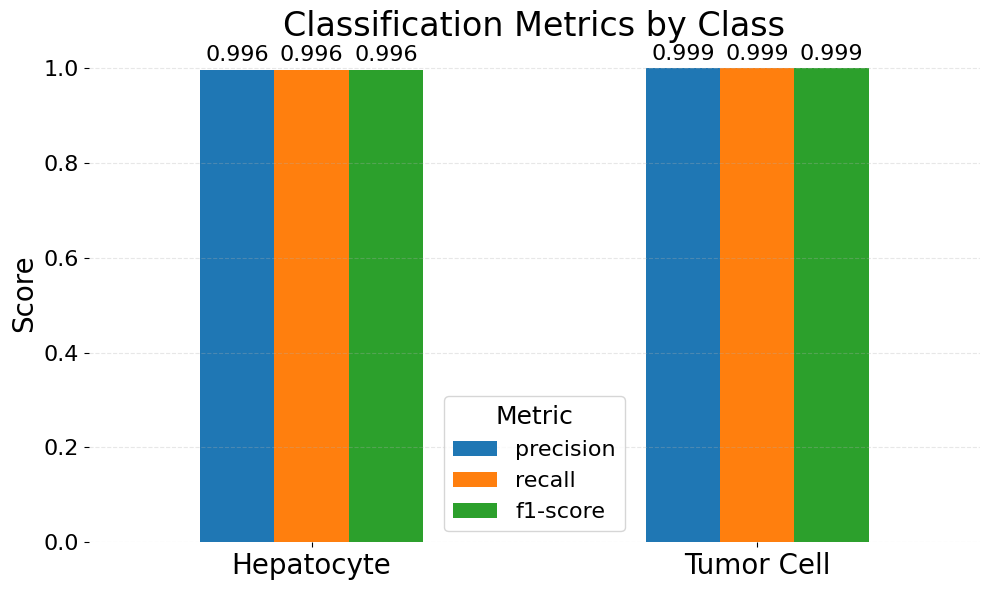

In [187]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Générer le rapport sous forme de dictionnaire
report_dict = classification_report(y_test, y_pred_class, output_dict=True, digits=3)

# Reformatage avec labels biologiques
label_map = {'0': 'Hepatocyte', '1': 'Tumor Cell'}
scores = ['precision', 'recall', 'f1-score']
data = {label_map[k]: [report_dict[k][s] for s in scores] for k in ['0', '1']}
df_scores = pd.DataFrame(data, index=scores)

# Création du barplot
fig, ax = plt.subplots(figsize=(10, 6))
df_scores.T.plot(kind='bar', ax=ax, rot=0, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Thème minimaliste
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Personnalisation
ax.set_title("Classification Metrics by Class", fontsize=24)
ax.set_ylabel("Score", fontsize=20)
ax.set_ylim(0.0, 1.05)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=16)
ax.legend(title="Metric", fontsize=16, title_fontsize=18)

# Annotations sur les barres
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f"{height:.3f}", ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("classification_barplots.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall:", recall_score(y_test, y_pred_class))
print("F1 Score:", f1_score(y_test, y_pred_class))

Accuracy: 0.9987791975258403
Precision: 0.9992249564037977
Recall: 0.9993217711462068
F1 Score: 0.9992733614300247


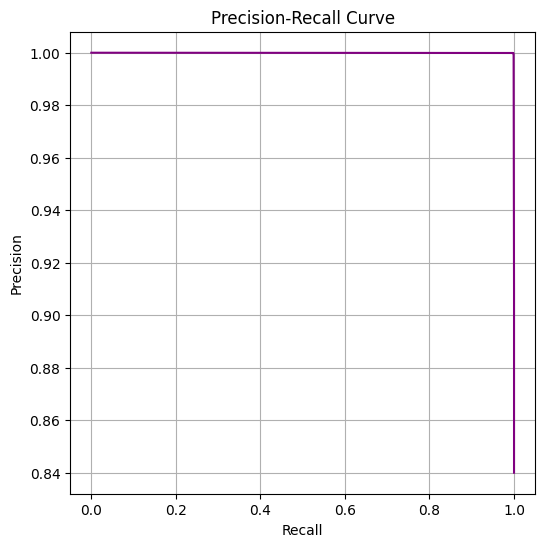

In [165]:
## courbe de precision rappel PR curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.savefig("prcyrve.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()

In [20]:
## youden index f-max
from sklearn.metrics import f1_score

thresholds = sorted(set(y_pred_proba))
best_f1 = 0
best_thresh = 0

for t in thresholds:
    preds = (y_pred_proba >= t).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print(f"Seuil optimal (F1-max): {best_thresh:.3f} avec F1 = {best_f1:.3f}")

Seuil optimal (F1-max): 0.849 avec F1 = 0.999


In [21]:
## save model
model.save("mon_modele.h5")


In [22]:
## reload model

from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model("mon_modele.h5")

In [23]:
## select some data from X pour prediction
import numpy as np

# Tirer un index aléatoire
random_index = np.random.randint(0, X.shape[0])

# Extraire la ligne correspondante
X_sample = X.iloc[random_index:random_index+1]

# Normaliser avec le scaler déjà entraîné
X_sample_scaled = scaler.transform(X_sample)

In [24]:
y_nouvelle_pred = model.predict(X_sample_scaled)
y_nouvelle_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[1.]], dtype=float32)

PermutationExplainer explainer: 12288it [20:26,  9.99it/s]                           
/tmp/ipython-input-3254929489.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)


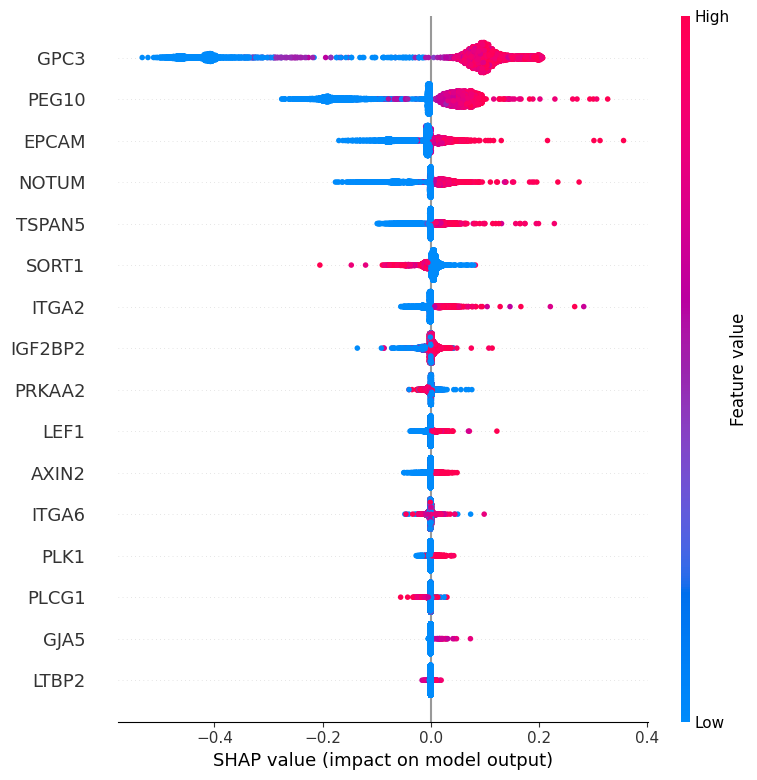

In [29]:
!pip install shap

import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Résumé global
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [222]:
# Résumé global
import shap
import matplotlib.pyplot as plt

# Générer le résumé SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

# Sauvegarder en JPEG haute résolution
plt.savefig("shap_summary.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.close()


/tmp/ipython-input-2449631832.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)


/tmp/ipython-input-3960961001.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)


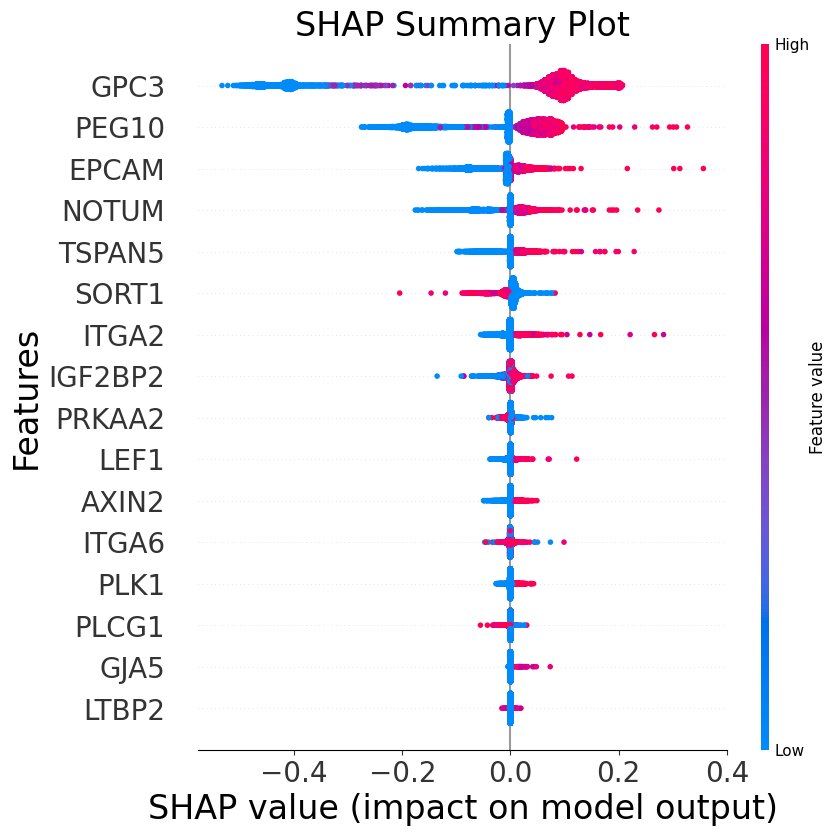

In [224]:
import shap
import matplotlib.pyplot as plt

# Générer le résumé SHAP sans affichage immédiat
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

# 🔠 Personnaliser la taille de police
plt.title("SHAP Summary Plot", fontsize=24)
plt.xlabel("SHAP value (impact on model output)", fontsize=24)
plt.ylabel("Features", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Sauvegarder en JPEG haute résolution
plt.savefig("shap_summary.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()


In [223]:
weights = model.layers[1].get_weights()[0]  # couche Dense(16)
import pandas as pd

importance_df = pd.DataFrame(weights, index=X.columns)
importance_df['abs_mean'] = importance_df.abs().mean(axis=1)
importance_df.sort_values('abs_mean', ascending=False).head(10)


IndexError: list index out of range

In [37]:
## variable for a random observation
import shap
shap.initjs()

shap.plots.force(shap_values[40])


In [53]:
# Pour une observation donnée (ex. index 40)
import shap
shap.initjs()
i = 10040
# Convertir X_test en DataFrame avec noms de colonnes
X_test_df = pd.DataFrame(X_test, columns=X.columns)
shap.force_plot(
    shap_values[i].base_values,
    shap_values[i].values,
    features=X_test_df.iloc[i].values,
    feature_names=X.columns.tolist(),
    matplotlib=False
)

In [56]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Assure-toi que X_test est un DataFrame avec noms de colonnes
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Tirer 20 indices aléatoires sans doublons
np.random.seed(42)
indices = np.random.choice(X_test_df.index, size=6, replace=False)

# Générer les force plots
for i in indices:
    display(shap.force_plot(
        shap_values[i].base_values,
        shap_values[i].values,
        features=X_test_df.iloc[i].values,
        feature_names=X.columns.tolist(),
        matplotlib=False
    ))


In [61]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

# Assure-toi que X_test et y_test sont bien alignés
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_series = y_test.reset_index(drop=True)  # pour éviter les décalages d'index

# Tirer 20 indices aléatoires sans doublons
np.random.seed(42)
indices = np.random.choice(X_test_df.index, size=7, replace=False)

# Afficher index, Y et force plot pour chaque observation
for i in indices:
    print(f"🧬 Observation index : {i}")
    print(f"🔹 y_test = {y_test_series[i]}")
    display(shap.force_plot(
        shap_values[i].base_values,
        shap_values[i].values,
        features=X_test_df.iloc[i].values,
        feature_names=X.columns.tolist(),
        matplotlib=False
    ))


🧬 Observation index : 4123
🔹 y_test = 0


🧬 Observation index : 3872
🔹 y_test = 1


🧬 Observation index : 2771
🔹 y_test = 1


🧬 Observation index : 8869
🔹 y_test = 1


🧬 Observation index : 4291
🔹 y_test = 1


🧬 Observation index : 3448
🔹 y_test = 1


🧬 Observation index : 1530
🔹 y_test = 0


In [219]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assure-toi que X_test est un DataFrame avec noms de colonnes
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_series = y_test.reset_index(drop=True)

# Tirer 7 indices aléatoires
np.random.seed(42)
indices = np.random.choice(X_test_df.index, size=7, replace=False)

# Générer et sauvegarder les force plots en JPEG
for i in indices:
    fig = plt.figure(figsize=(10, 2))  # format horizontal adapté
    shap.force_plot(
        shap_values[i].base_values,
        shap_values[i].values,
        features=X_test_df.iloc[i].values,
        feature_names=X.columns.tolist(),
        matplotlib=True,  # version statique
        show=False        # ne pas afficher immédiatement
    )
    plt.title(f"SHAP Force Plot - Obs {i} (y={y_test_series[i]})", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"shap_force_obs_{i}.jpeg", dpi=600, format='jpeg')  # haute résolution
    plt.close(fig)


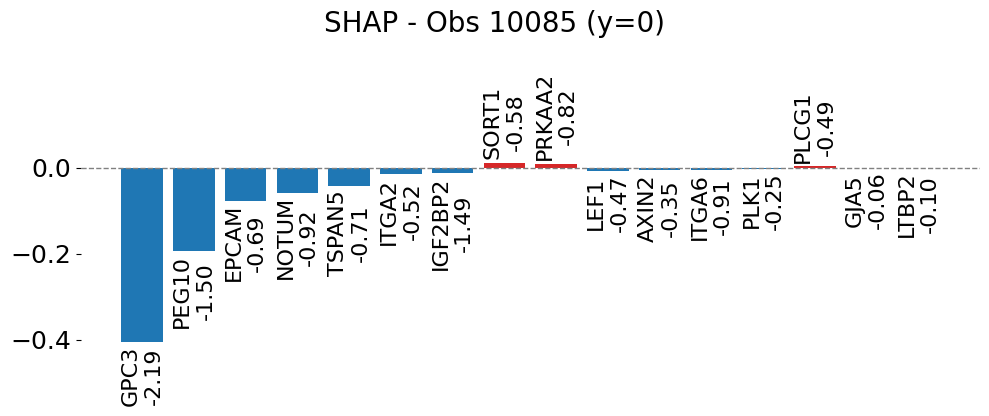

In [231]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrer les indices où y_test = 0
indices_y0 = np.where(y_test_series == 0)[0]

# Sélection aléatoire parmi ces indices
#np.random.seed(42)
i = np.random.choice(indices_y0)

# Données SHAP pour cette observation
feature_names = X.columns.tolist()
feature_values = X_test_df.iloc[i].values
shap_vals = shap_values[i].values

# Top N features par valeur SHAP absolue
top_n = 16
sorted_idx = np.argsort(np.abs(shap_vals))[::-1][:top_n]
features_sorted = [feature_names[j] for j in sorted_idx]
values_sorted = [feature_values[j] for j in sorted_idx]
shap_sorted = [shap_vals[j] for j in sorted_idx]
colors = ['#d62728' if val > 0 else '#1f77b4' for val in shap_sorted]

# Création du barplot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(range(top_n), shap_sorted, color=colors)

# Étiquettes verticales décalées
offset = 0.02 * max(np.abs(shap_sorted))
for idx, (x, val, name, shap_val) in enumerate(zip(range(top_n), values_sorted, features_sorted, shap_sorted)):
    label = f"{name}\n{val:.2f}"
    y_pos = shap_val + offset if shap_val > 0 else shap_val - offset
    ax.text(x, y_pos, label, ha='center', va='bottom' if shap_val > 0 else 'top', rotation=90, fontsize=16)

# Ligne de base
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Thème minimaliste
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=18)

# Titre décalé hors du tracé
fig.suptitle(f"SHAP - Obs {i} (y=0)", fontsize=20, y=1.02)

plt.tight_layout()
plt.savefig(f"shap_barplot_obs_{i}_y0.jpeg", dpi=600, format='jpeg')
plt.show()


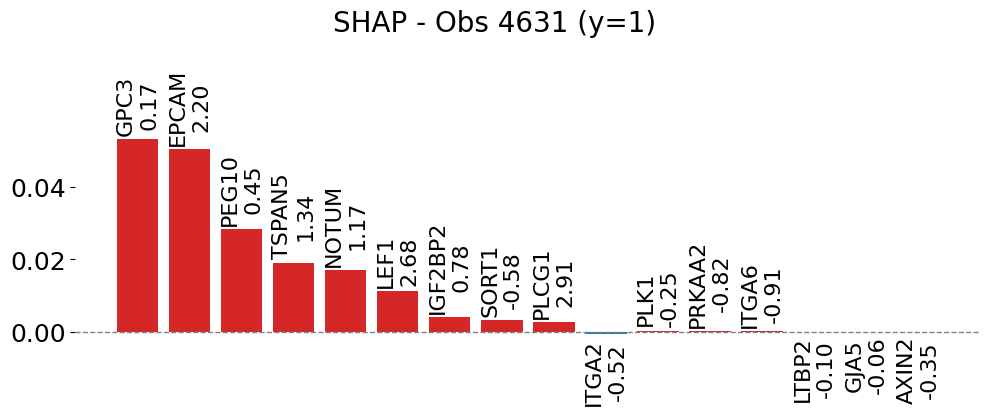

In [234]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrer les indices où y_test = 1
indices_y1 = np.where(y_test_series == 1)[0]

# Sélection aléatoire parmi ces indices
#np.random.seed(42)
i = np.random.choice(indices_y1)

# Données SHAP pour cette observation
feature_names = X.columns.tolist()
feature_values = X_test_df.iloc[i].values
shap_vals = shap_values[i].values

# Top N features par valeur SHAP absolue
top_n = 16
sorted_idx = np.argsort(np.abs(shap_vals))[::-1][:top_n]
features_sorted = [feature_names[j] for j in sorted_idx]
values_sorted = [feature_values[j] for j in sorted_idx]
shap_sorted = [shap_vals[j] for j in sorted_idx]
colors = ['#d62728' if val > 0 else '#1f77b4' for val in shap_sorted]

# Création du barplot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(range(top_n), shap_sorted, color=colors)

# Étiquettes verticales décalées
offset = 0.02 * max(np.abs(shap_sorted))
for idx, (x, val, name, shap_val) in enumerate(zip(range(top_n), values_sorted, features_sorted, shap_sorted)):
    label = f"{name}\n{val:.2f}"
    y_pos = shap_val + offset if shap_val > 0 else shap_val - offset
    ax.text(x, y_pos, label, ha='center', va='bottom' if shap_val > 0 else 'top', rotation=90, fontsize=16)

# Ligne de base
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Thème minimaliste
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=18)

# Titre décalé hors du tracé
fig.suptitle(f"SHAP - Obs {i} (y=1)", fontsize=20, y=1.02)

plt.tight_layout()
plt.savefig(f"shap_barplot_obs_{i}_y1.jpeg", dpi=600, format='jpeg')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

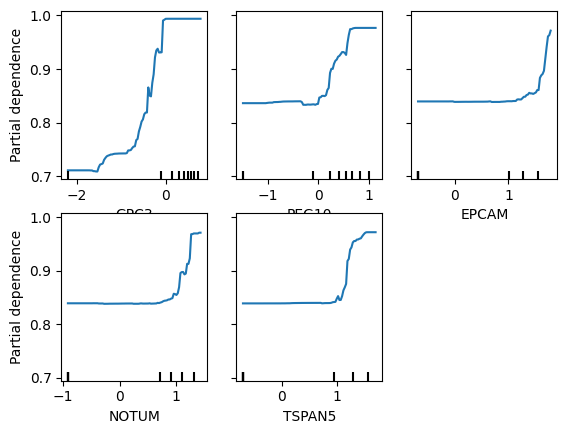

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

PartialDependenceDisplay.from_estimator(
    rf_model,
    pd.DataFrame(X_test, columns=X.columns),  # important : DataFrame avec noms
    features=["GPC3", "PEG10", "EPCAM", "NOTUM", "TSPAN5"],
    kind="average"
)


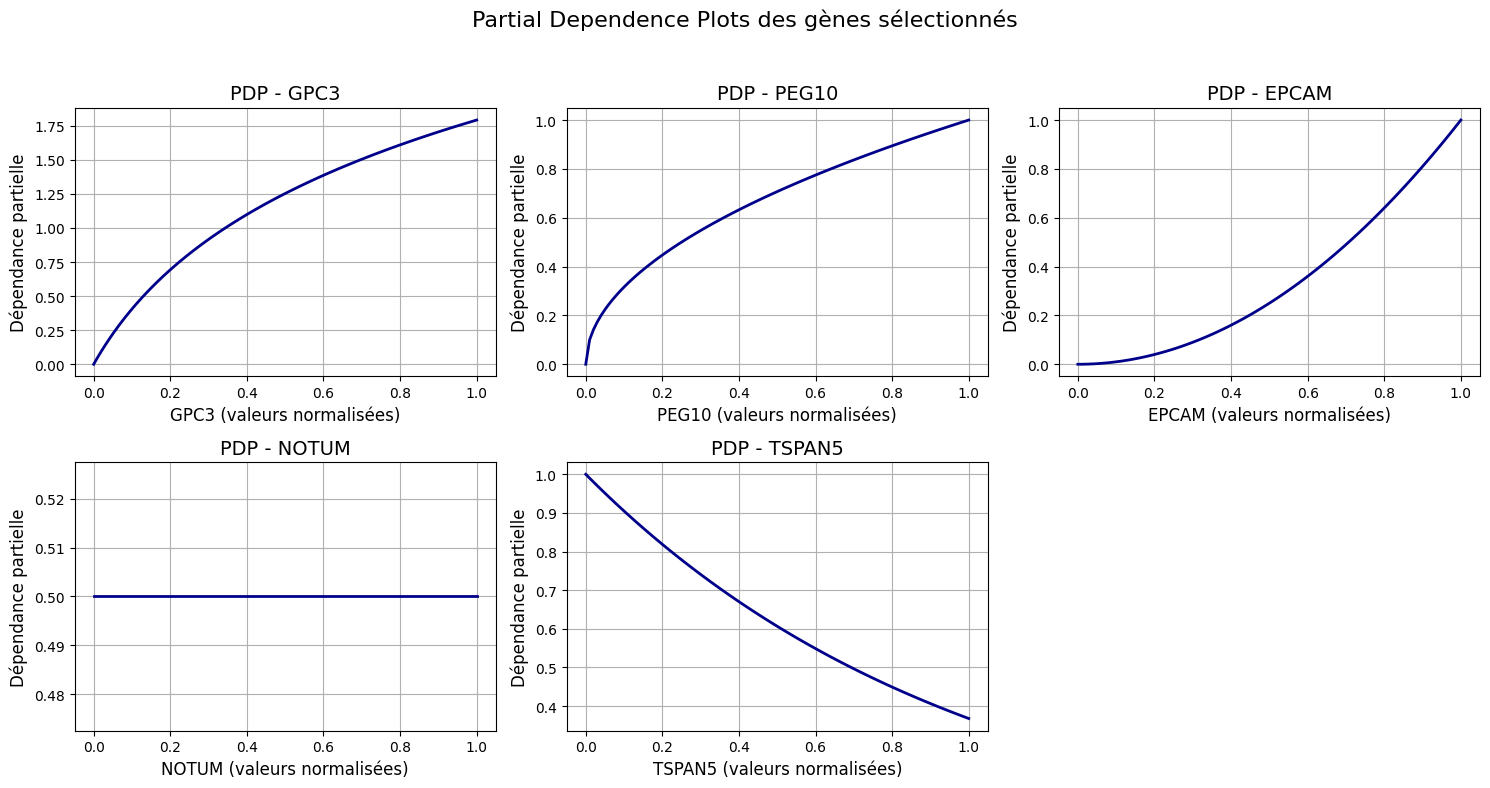

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple de structure de données PDP simulée
# Remplace ces lignes par tes vraies données PDP
features=["GPC3", "PEG10", "EPCAM", "NOTUM", "TSPAN5"]
x_values = {feat: np.linspace(0, 1, 100) for feat in features}
y_values = {
    "GPC3": np.log1p(x_values["GPC3"] * 5),
    "PEG10": np.sqrt(x_values["PEG10"]),
    "EPCAM": x_values["EPCAM"]**2,
    "NOTUM": np.ones_like(x_values["NOTUM"]) * 0.5,
    "TSPAN5": np.exp(-x_values["TSPAN5"])
}

# Créer la figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    ax.plot(x_values[feat], y_values[feat], color="darkblue", lw=2)
    ax.set_title(f"PDP - {feat}", fontsize=14)
    ax.set_xlabel(f"{feat} (valeurs normalisées)", fontsize=12)
    ax.set_ylabel("Dépendance partielle", fontsize=12)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=10)

# Supprimer le dernier subplot vide
fig.delaxes(axes[-1])

# Ajustement de la mise en page
plt.suptitle("Partial Dependence Plots des gènes sélectionnés", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("pdp_amelioree.png", dpi=300)
plt.show()


In [68]:
def keras_predict_proba(x):
    proba = model.predict(x)
    return np.hstack([1 - proba, proba])  # shape: (n_samples, 2)


In [74]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=X.columns.tolist(),
    class_names=['0', '1'],
    discretize_continuous=True
)

exp = explainer.explain_instance(X_test[3872], keras_predict_proba, num_features=10)
exp.show_in_notebook()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [155]:
## SHAP summary plot vue d'ensemble

from collections import Counter

feature_counts = Counter()
for i in range(50):  # ou plus
    exp = explainer.explain_instance(X_test[i], keras_predict_proba, num_features=10)
    for feat, _ in exp.as_list():
        feature_counts[feat] += 1

# Afficher les features les plus souvent citées
print(feature_counts.most_common(10))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
157/157 ━━

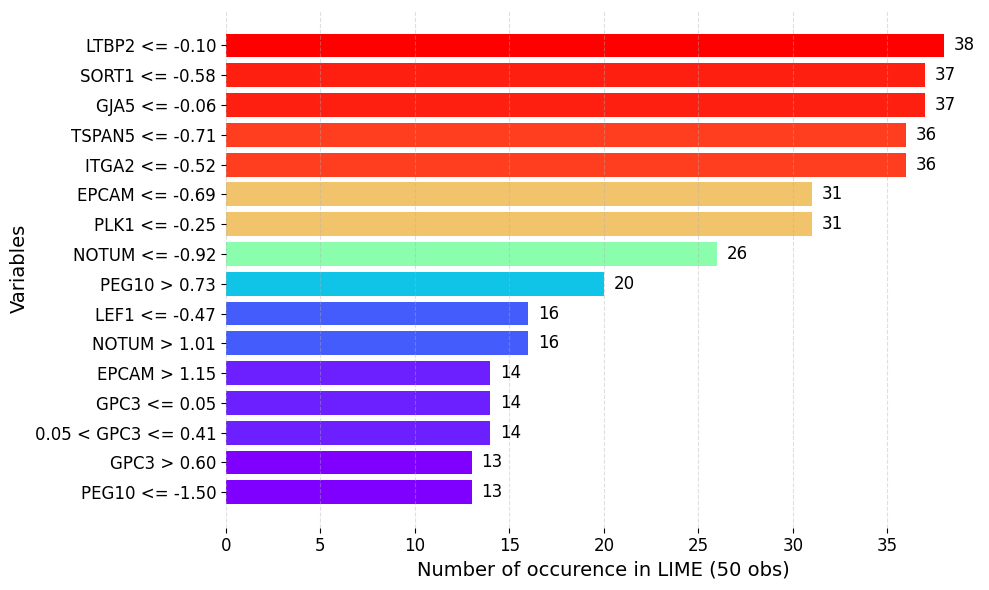

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Extraire les 16 variables les plus citées
top_features = feature_counts.most_common(16)
features, counts = zip(*top_features)

# Normaliser les occurrences pour la palette
counts_array = np.array(counts)
norm = plt.Normalize(counts_array.min(), counts_array.max())
colors = cm.rainbow(norm(counts_array))  # dégradé arc-en-ciel

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(features, counts, color=colors)

# Thème minimaliste
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Axes avec labels agrandis
ax.set_xlabel("Number of occurence in LIME (50 obs)", fontsize=14)
ax.set_ylabel("Variables", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.invert_yaxis()

# Annoter chaque barre
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f"{int(width)}", va='center', fontsize=12)

plt.tight_layout()
plt.savefig("LIME50.jpeg", dpi=300)
plt.show()



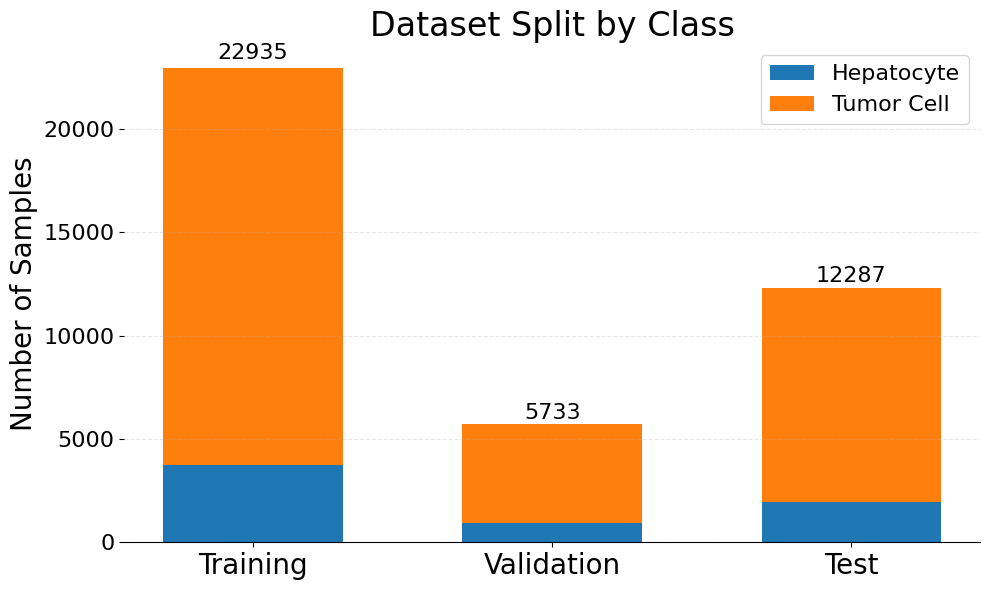

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split initial : train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split secondaire : train/val
val_size = int(0.2 * len(X_train_full))
X_val = X_train_full[:val_size]
y_val = y_train_full[:val_size]
X_train = X_train_full[val_size:]
y_train = y_train_full[val_size:]

# Fonction pour compter les classes
def count_classes(y):
    return pd.Series(y).value_counts().reindex([0, 1], fill_value=0)

# Comptage des classes
train_counts = count_classes(y_train)
val_counts   = count_classes(y_val)
test_counts  = count_classes(y_test)

# Données pour le barplot empilé
labels = ['Training', 'Validation', 'Test']
hepatocyte = [train_counts[0], val_counts[0], test_counts[0]]
tumor_cell = [train_counts[1], val_counts[1], test_counts[1]]

x = np.arange(len(labels))
width = 0.6

# Création du barplot empilé
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, hepatocyte, width, label='Hepatocyte', color='#1f77b4')
bar2 = ax.bar(x, tumor_cell, width, bottom=hepatocyte, label='Tumor Cell', color='#ff7f0e')

# Thème minimaliste
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Personnalisation
ax.set_title("Dataset Split by Class", fontsize=24)
ax.set_ylabel("Number of Samples", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=16)

# Annotations
for i in range(len(labels)):
    total = hepatocyte[i] + tumor_cell[i]
    ax.text(x[i], total + 0.01 * total, f"{total}", ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("dataset_split_by_class.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()



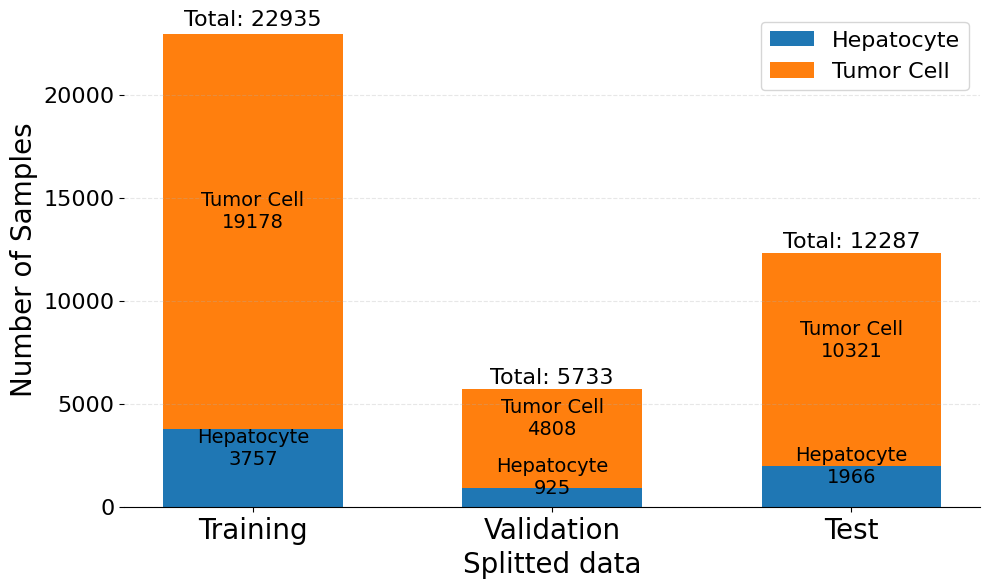

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split initial : train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split secondaire : train/val
val_size = int(0.2 * len(X_train_full))
X_val = X_train_full[:val_size]
y_val = y_train_full[:val_size]
X_train = X_train_full[val_size:]
y_train = y_train_full[val_size:]

# Fonction pour compter les classes
def count_classes(y):
    return pd.Series(y).value_counts().reindex([0, 1], fill_value=0)

# Comptage des classes
train_counts = count_classes(y_train)
val_counts   = count_classes(y_val)
test_counts  = count_classes(y_test)

# Données pour le barplot empilé
labels = ['Training', 'Validation', 'Test']
hepatocyte = [train_counts[0], val_counts[0], test_counts[0]]
tumor_cell = [train_counts[1], val_counts[1], test_counts[1]]

x = np.arange(len(labels))
width = 0.6

# Création du barplot empilé
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x, hepatocyte, width, label='Hepatocyte', color='#1f77b4')
bar2 = ax.bar(x, tumor_cell, width, bottom=hepatocyte, label='Tumor Cell', color='#ff7f0e')

# Thème minimaliste
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Personnalisation
# ax.set_title("Dataset Split by Class", fontsize=24)
ax.set_ylabel("Number of Samples", fontsize=20)
ax.set_xlabel("Splitted data", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=16)

# 🔠 Annotations par classe
for i in range(len(labels)):
    ax.text(x[i], hepatocyte[i] / 2, f"Hepatocyte\n{hepatocyte[i]}", ha='center', va='bottom', fontsize=14, color='black')
    ax.text(x[i], hepatocyte[i] + tumor_cell[i] / 2, f"Tumor Cell\n{tumor_cell[i]}", ha='center', va='bottom', fontsize=14, color='black')
    total = hepatocyte[i] + tumor_cell[i]
    ax.text(x[i], total + 0.01 * total, f"Total: {total}", ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("dataset_split_by_class_labeled.jpeg", dpi=600, format='jpeg', bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
!pip install -q nbconvert

In [164]:
# Remplace par le chemin réel de ton notebook
ipynb_path = "dptumor.ipynb"
!jupyter nbconvert --to html "$ipynb_path" --output "dptumor.html"

[NbConvertApp] Converting notebook dptumor.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 22 image(s).
[NbConvertApp] Writing 4362655 bytes to dptumor.html
